### Importing Python libraries

In [1]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [2]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
# Standard plotly imports
import plotly
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py 
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [4]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)

### Importing the data

> Let's import the dataset and make of a copy of the source file for this analysis. <br> The dataset contains 1,470 rows and 35 columns.

In [5]:
# Read Excel file
df_sourcefile = pd.read_excel("D:\CSV file\HR-Employee-Attrition.xlsx")
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (1470, 35)


In [6]:
# Make a copy of the original sourcefile
df_HR = df_sourcefile.copy()

### Data Description and Exploratory Visualisations

> In this section, we will provide data visualizations that summarizes or extracts relevant characteristics of features in our dataset. Let's look at each column in detail, get a better understanding of the dataset, and group them together when appropriate.

#### Overview

In [7]:
# Dataset columns
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# Dataset header
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


> The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [9]:
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [10]:
# Columns datatypes and missign values
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

> The data provided has no missing values. In HR Analytics, employee data is unlikely to feature large ratio of missing values as HR Departments typically have all personal and employment data on-file. However, the type of documentation data is being kept in (i.e. whether it is paper-based, Excel spreadhsheets, databases, etc) has a massive impact on the accuracy and the ease of access to the HR data.

#### Numerical features overview

In [11]:
df_HR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


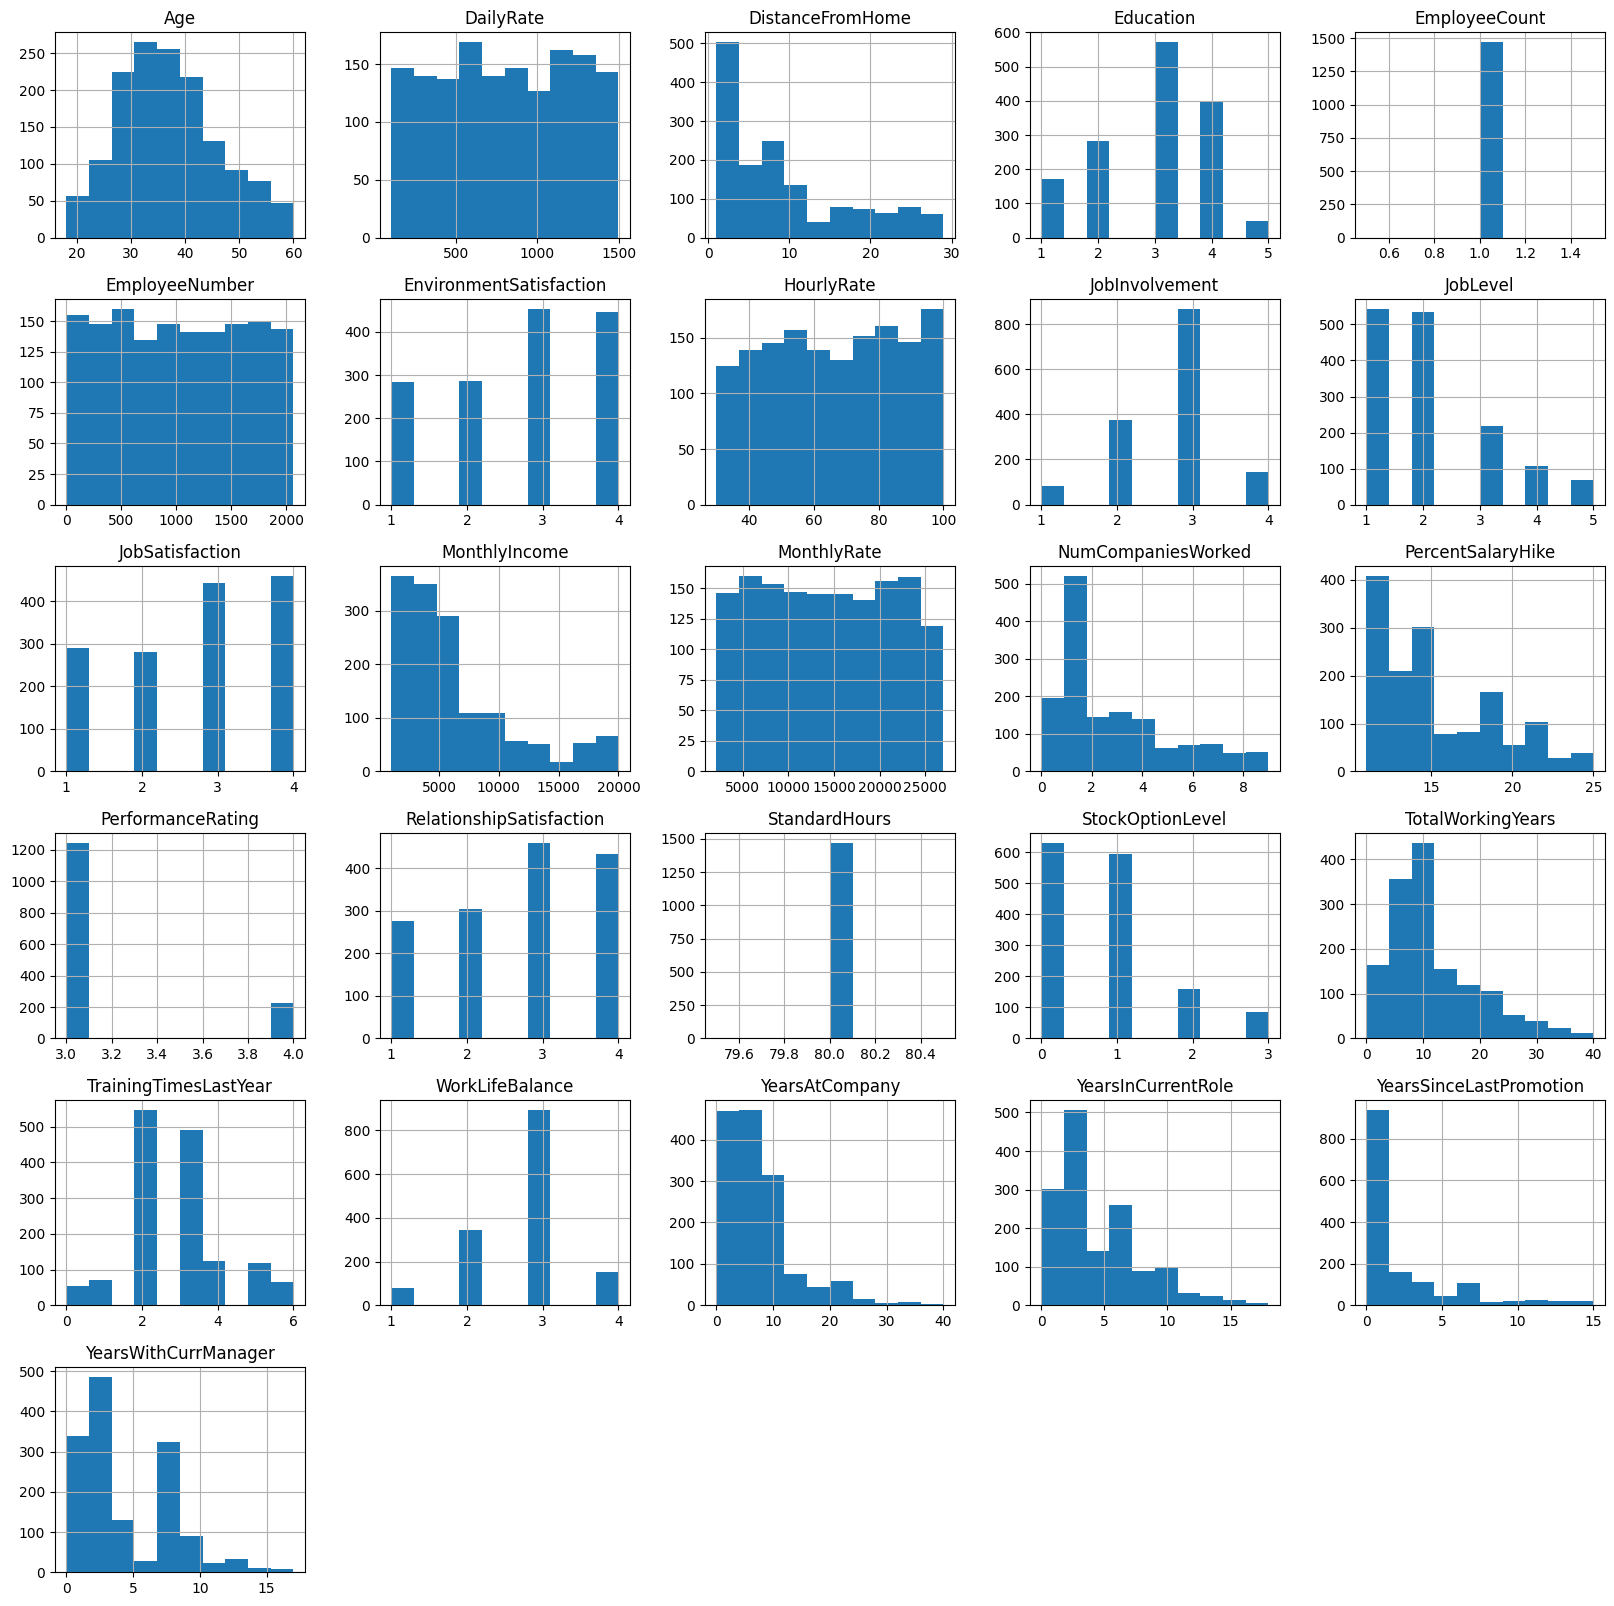

In [12]:
df_HR.hist(figsize=(20,20))
plt.show()

> A few observations can be made based on the information and histograms for numerical features:
 - Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
 - Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
 - EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.
 - Employee Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution.

### Feature distribution by target attribute

#### Age

> The age distributions for Active and Ex-employees only differs by one year. <br>
The average age of ex-employees is **33.6** years old, while **37.6** is the average age for current employees.

In [13]:
(mu, sigma) = norm.fit(df_HR.loc[df_HR['Attrition'] == 'Yes', 'Age'])
print(
    'Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_HR.loc[df_HR['Attrition'] == 'No', 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))

Ex-exmployees: average age = 33.6 years old and standard deviation = 9.7
Current exmployees: average age = 37.6 years old and standard deviation = 8.9


> Let's create a kernel density estimation (KDE) plot colored by the value of the target. A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.

In [14]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'Age']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'Age']

# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, 
                         curve_type='kde', show_hist=False, show_rug=False)

# Add title and adjust layout
fig.update_layout(title='Age Distribution in Percent by Attrition Status',
                  xaxis=dict(range=[15, 60], dtick=5))

#### Education

> Several Education Fields are represented in the dataset, namely: Human Resources, Life Sciences, Marketing, Medical, Technical Degree, and a miscellaneous category Other. Here, I plot the normalized % of Leavers for each Education Field.

In [15]:
# Education Field of employees
df_HR['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by Education Field (%)'}, xlabel='Field'>

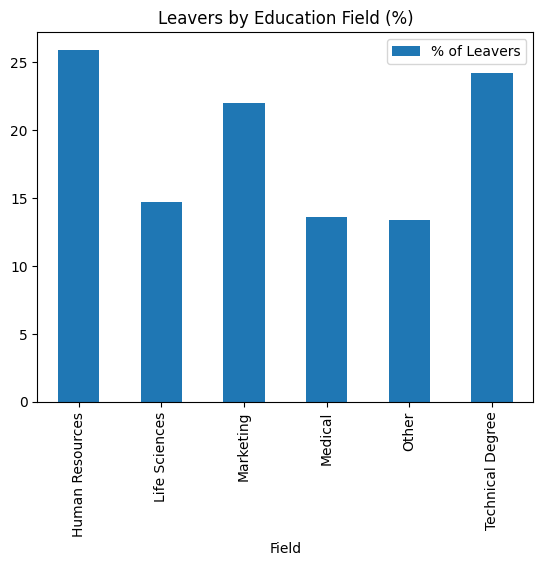

In [16]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(df_HR['EducationField'].unique()):
    ratio = df_HR[(df_HR['EducationField']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.plot(kind='bar',title='Leavers by Education Field (%)')

#### Gender

> Gender distribution shows that the dataset features a higher relative proportion of male ex-employees than female ex-employees, with normalised gender distribution of ex-employees in the dataset at 17.0% for Males and 14.8% for Females.

In [17]:
# Gender of employees
df_HR['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [18]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((df_HR[(df_HR['Attrition'] == 'Yes') & (
    df_HR['Gender'] == 'Male')].shape[0] / df_HR[df_HR['Gender'] == 'Male'].shape[0])*100, (df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['Gender'] == 'Female')].shape[0] / df_HR[df_HR['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of ex-employees in the dataset: Male = 17.0%; Female 14.8%.


<Axes: title={'center': 'Leavers by Gender (%)'}, xlabel='Gender'>

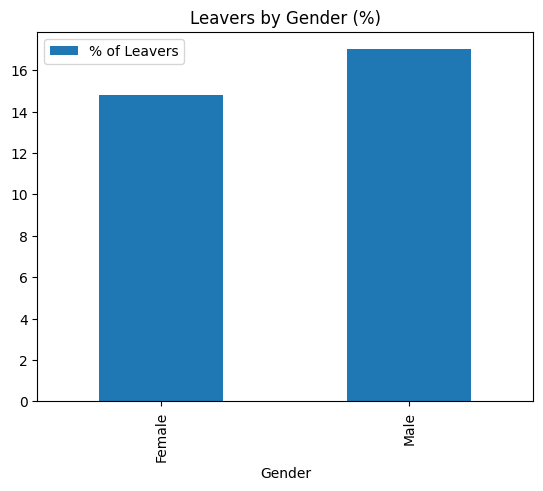

In [19]:
df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0
for field in list(df_HR['Gender'].unique()):
    ratio = df_HR[(df_HR['Gender']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = df_Gender.groupby(by="Gender").sum()
df_G.plot(kind='bar',title='Leavers by Gender (%)')

#### Marital Status

> The dataset features three marital status: Married (673 employees), Single (470 employees), Divorced (327 employees). <br>
Single employees show the largest proportion of leavers at 25%.

In [20]:
# Marital Status of employees
df_HR['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by Marital Status (%)'}, xlabel='Marital Status'>

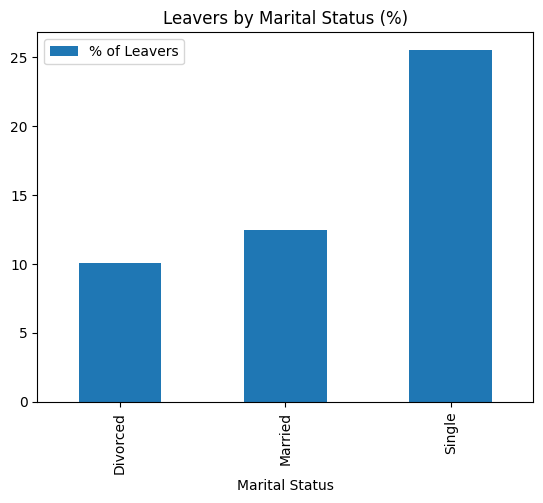

In [21]:
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])
i=0
for field in list(df_HR['MaritalStatus'].unique()):
    ratio = df_HR[(df_HR['MaritalStatus']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['MaritalStatus']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_MF = df_Marital.groupby(by="Marital Status").sum()
df_MF.plot(kind='bar',title='Leavers by Marital Status (%)')

#### Distance from Home

> Distance from home for employees to get to work varies from 1 to 29 miles. There is no discernable strong correlation between Distance from Home and Attrition Status as per the KDE plot below.

In [22]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df_HR['DistanceFromHome'].min(),
                                                                                       df_HR['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [23]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


In [24]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import plotly.figure_factory as ff
import plotly.offline as pyo

# Initialize offline mode
pyo.init_notebook_mode(connected=True)

# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'DistanceFromHome']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'DistanceFromHome']

# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, curve_type='kde', show_hist=False, show_rug=False)

# Add title
fig.update_layout(title='Distance From Home Distribution in Percent by Attrition Status')
fig.update_xaxes(range=[0, 30], dtick=2)

# Plot
pyo.iplot(fig)


#### Department

> The data features employee data from three departments: Research & Development, Sales, and Human Resources.

In [26]:
# The organisation consists of several departments
df_HR['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by Department (%)'}, xlabel='Department'>

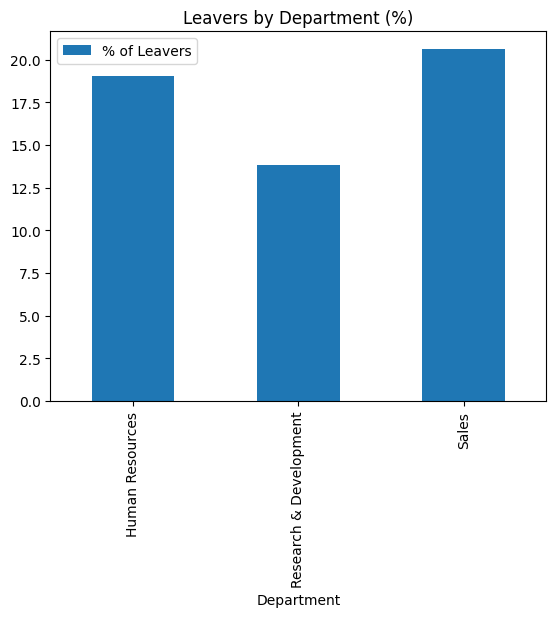

In [27]:
df_Department = pd.DataFrame(columns=["Department", "% of Leavers"])
i=0
for field in list(df_HR['Department'].unique()):
    ratio = df_HR[(df_HR['Department']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['Department']==field].shape[0]
    df_Department.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_DF = df_Department.groupby(by="Department").sum()
df_DF.plot(kind='bar',title='Leavers by Department (%)')

#### Role and Work Conditions

> A preliminary look at the relationship between Business Travel frequency and Attrition Status shows that there is a largest normalized proportion of Leavers for employees that travel "frequently". Travel metrics associated with Business Travel status were not disclosed (i.e. how many hours of Travel is considered "Frequent").

In [28]:
# Employees have different business travel commitmnent depending on their roles and level in the organisation
df_HR['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by Business Travel (%)'}, xlabel='Business Travel'>

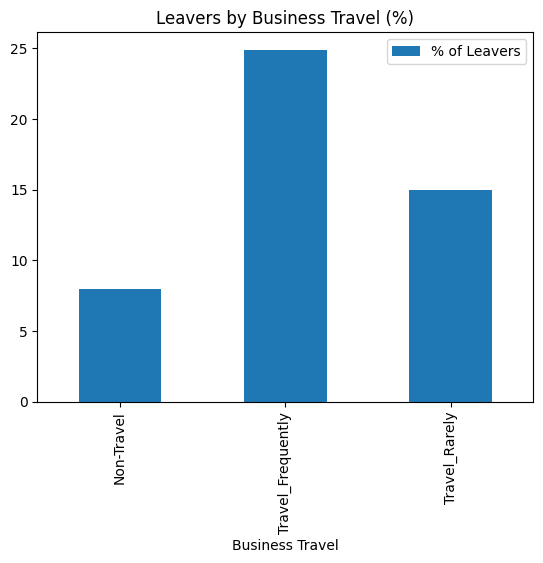

In [29]:
df_BusinessTravel = pd.DataFrame(columns=["Business Travel", "% of Leavers"])
i=0
for field in list(df_HR['BusinessTravel'].unique()):
    ratio = df_HR[(df_HR['BusinessTravel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_BT = df_BusinessTravel.groupby(by="Business Travel").sum()
df_BT.plot(kind='bar',title='Leavers by Business Travel (%)')

> Several Job Roles are listed in the dataset: Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources.

In [30]:
# Employees in the database have several roles on-file
df_HR['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by Job Role (%)'}, xlabel='Job Role'>

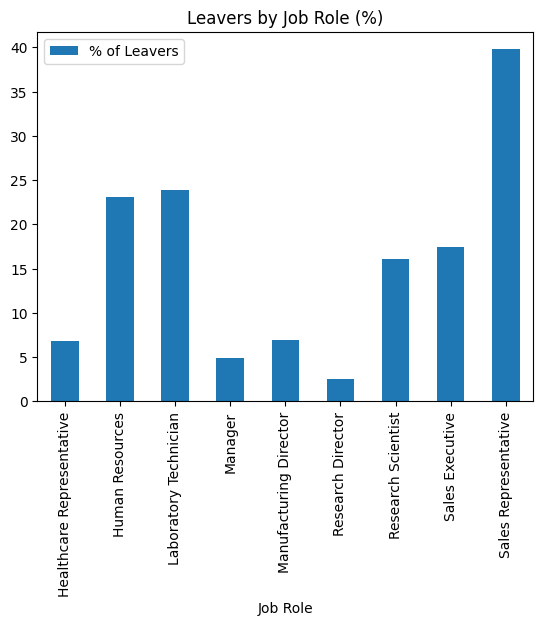

In [31]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df_HR['JobRole'].unique()):
    ratio = df_HR[(df_HR['JobRole']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_JobRole.groupby(by="Job Role").sum()
df_JR.plot(kind='bar',title='Leavers by Job Role (%)')

> Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). Employees with an assigned Job Level of "1" show the largest normalized proportion of Leavers.

In [32]:
df_HR['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by Job Level (%)'}, xlabel='Job Level'>

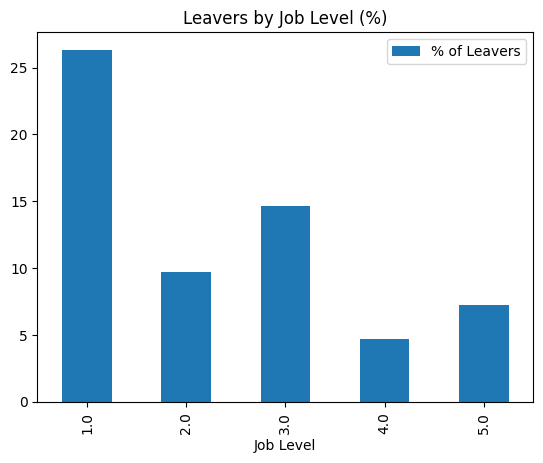

In [33]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df_HR['JobLevel'].unique()):
    ratio = df_HR[(df_HR['JobLevel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JL = df_JobLevel.groupby(by="Job Level").sum()
df_JL.plot(kind='bar',title='Leavers by Job Level (%)')

> A ranking is associated to the employee's Job Involvement :1 'Low' 2 'Medium' 3 'High' 4 'Very High'. The plot below indicates a negative correlation with the Job Involvement of an employee and the Attrition Status. In other words, employees with higher Job Involvement are less likely to leave.

In [34]:
df_HR['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by Job Involvement (%)'}, xlabel='Job Involvement'>

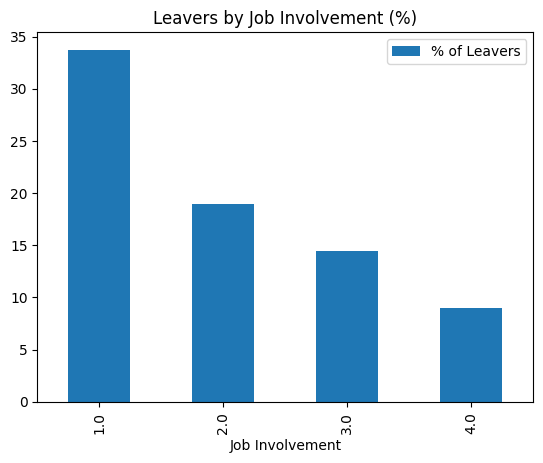

In [35]:
df_JobInvolvement = pd.DataFrame(columns=["Job Involvement", "% of Leavers"])
i=0
for field in list(df_HR['JobInvolvement'].unique()):
    ratio = df_HR[(df_HR['JobInvolvement']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobInvolvement']==field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JI = df_JobInvolvement.groupby(by="Job Involvement").sum()
df_JI.plot(kind='bar',title='Leavers by Job Involvement (%)')

> The data indicates that employees may have access to some Training. A feature indicates how many years it's been since the employee attended such training.

In [36]:
print("Number of training times last year varies from {} to {} years.".format(
    df_HR['TrainingTimesLastYear'].min(), df_HR['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


In [37]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'TrainingTimesLastYear']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'TrainingTimesLastYear']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(
    title='Training Times Last Year metric in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 6], dtick=1))
# Plot
pyo.iplot(fig, filename='Distplot with Multiple Datasets')

> There is a feature for the number of companies the employee has worked at. <br>
> 0 likely indicates that according to records, the employee has only worked at this company

In [38]:
df_HR['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by Num Companies Worked (%)'}, xlabel='Num Companies Worked'>

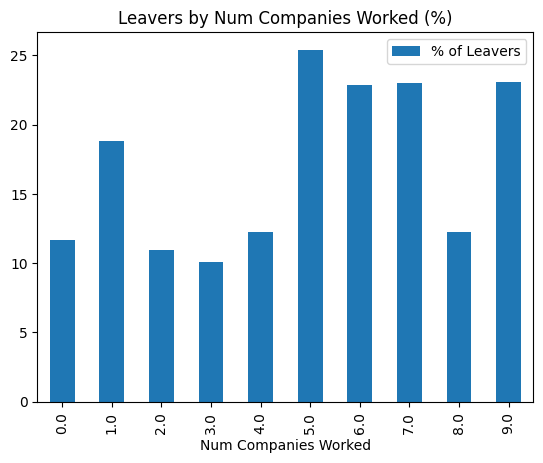

In [39]:
df_NumCompaniesWorked = pd.DataFrame(columns=["Num Companies Worked", "% of Leavers"])
i=0
for field in list(df_HR['NumCompaniesWorked'].unique()):
    ratio = df_HR[(df_HR['NumCompaniesWorked']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['NumCompaniesWorked']==field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_NC = df_NumCompaniesWorked.groupby(by="Num Companies Worked").sum()
df_NC.plot(kind='bar',title='Leavers by Num Companies Worked (%)')

#### Years at the Company

In [40]:
df_HR

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [41]:
print('Average Number of Years at the company for currently active employees: {:.2f} miles and ex-employees: {:.2f} years'.format(
    df_HR[df_HR['Attrition'] == 'No']['YearsAtCompany'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['YearsAtCompany'].mean()))

Average Number of Years at the company for currently active employees: 7.37 miles and ex-employees: 5.13 years


In [42]:
print("Number of Years at the company varies from {} to {} years.".format(
    df_HR['YearsAtCompany'].min(), df_HR['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 40 years.


In [43]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'YearsAtCompany']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsAtCompany']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Years At Company in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 40], dtick=5))
# Plot
pyo.iplot(fig, filename='Distplot with Multiple Datasets')

In [44]:
print("Number of Years in the current role varies from {} to {} years.".format(
    df_HR['YearsInCurrentRole'].min(), df_HR['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years.


In [45]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'YearsInCurrentRole']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsInCurrentRole']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Years InCurrent Role in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 18], dtick=1))
# Plot
pyo.iplot(fig, filename='Distplot with Multiple Datasets')

In [46]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    df_HR['YearsSinceLastPromotion'].min(), df_HR['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


In [47]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'YearsSinceLastPromotion']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsSinceLastPromotion']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Years Since Last Promotion in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 15], dtick=1))
# Plot
pyo.iplot(fig, filename='Distplot with Multiple Datasets')

In [48]:
print("Total working years varies from {} to {} years.".format(
    df_HR['TotalWorkingYears'].min(), df_HR['TotalWorkingYears'].max()))

Total working years varies from 0 to 40 years.


In [49]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'TotalWorkingYears']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'TotalWorkingYears']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Total Working Years in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 40], dtick=5))
# Plot
pyo.iplot(fig, filename='Distplot with Multiple Datasets')

#### Years With Current Manager

In [50]:
print('Average Number of Years wit current manager for currently active employees: {:.2f} miles and ex-employees: {:.2f} years'.format(
    df_HR[df_HR['Attrition'] == 'No']['YearsWithCurrManager'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['YearsWithCurrManager'].mean()))

Average Number of Years wit current manager for currently active employees: 4.37 miles and ex-employees: 2.85 years


In [51]:
print("Number of Years wit current manager varies from {} to {} years.".format(
    df_HR['YearsWithCurrManager'].min(), df_HR['YearsWithCurrManager'].max()))

Number of Years wit current manager varies from 0 to 17 years.


In [52]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'YearsWithCurrManager']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsWithCurrManager']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(
    title='Years With Curr Manager in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 17], dtick=1))
# Plot
pyo.iplot(fig, filename='Distplot with Multiple Datasets')

#### Work-Life Balance Score

> A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.

In [53]:
df_HR['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by WorkLifeBalance (%)'}, xlabel='WorkLifeBalance'>

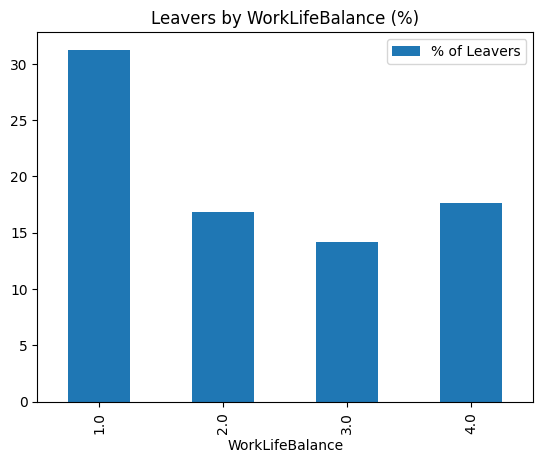

In [54]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df_HR['WorkLifeBalance'].unique()):
    ratio = df_HR[(df_HR['WorkLifeBalance']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
df_WLB.plot(kind='bar',title='Leavers by WorkLifeBalance (%)')

> All employees have a standard 80-hour work commitment

In [55]:
df_HR['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

> Some employees have overtime commitments. The data clearly show that there is significant larger portion of employees with OT that have left the company.

In [56]:
df_HR['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by OverTime (%)'}, xlabel='OverTime'>

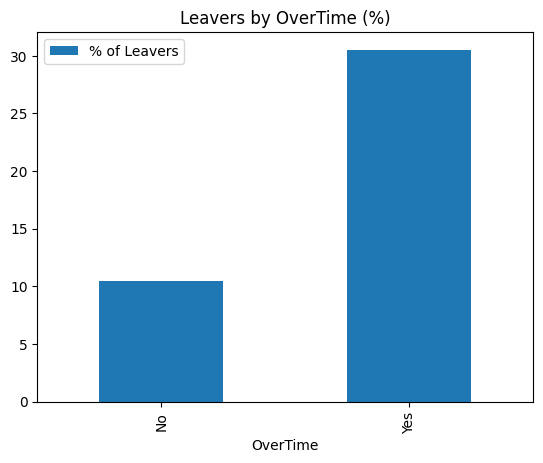

In [57]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df_HR['OverTime'].unique()):
    ratio = df_HR[(df_HR['OverTime']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_OT = df_OverTime.groupby(by="OverTime").sum()
df_OT.plot(kind='bar',title='Leavers by OverTime (%)')

#### Pay/Salary Employee Information

In [58]:
print("Employee Hourly Rate varies from ${} to ${}.".format(
    df_HR['HourlyRate'].min(), df_HR['HourlyRate'].max()))

Employee Hourly Rate varies from $30 to $100.


In [59]:
print("Employee Daily Rate varies from ${} to ${}.".format(
    df_HR['DailyRate'].min(), df_HR['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [60]:
print("Employee Monthly Rate varies from ${} to ${}.".format(
    df_HR['MonthlyRate'].min(), df_HR['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [61]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    df_HR['MonthlyIncome'].min(), df_HR['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


In [62]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'MonthlyIncome']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'MonthlyIncome']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Monthly Income by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 20000], dtick=2000))
# Plot
pyo.iplot(fig, filename='Distplot with Multiple Datasets')

In [63]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(
    df_HR['PercentSalaryHike'].min(), df_HR['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


In [64]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'PercentSalaryHike']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'PercentSalaryHike']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Percent Salary Hike by Attrition Status')
fig['layout'].update(xaxis=dict(range=[10, 26], dtick=1))
# Plot
pyo.iplot(fig, filename='Distplot with Multiple Datasets')

In [65]:
print("Stock Option Levels varies from {} to {}.".format(
    df_HR['StockOptionLevel'].min(), df_HR['StockOptionLevel'].max()))

Stock Option Levels varies from 0 to 3.


In [66]:
print("Normalised percentage of leavers by Stock Option Level: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 1)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 2)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 3)].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 1: 9.40%, 2: 2.01%, 3: 2.52%


<Axes: title={'center': 'Leavers by Stock Option Level (%)'}, xlabel='StockOptionLevel'>

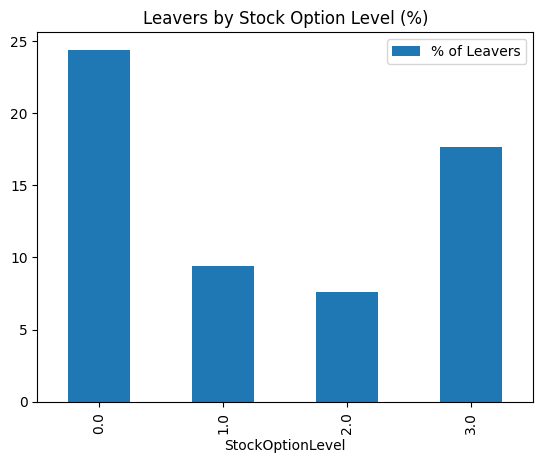

In [67]:
df_StockOptionLevel = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i=0
for field in list(df_HR['StockOptionLevel'].unique()):
    ratio = df_HR[(df_HR['StockOptionLevel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['StockOptionLevel']==field].shape[0]
    df_StockOptionLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_SOL = df_StockOptionLevel.groupby(by="StockOptionLevel").sum()
df_SOL.plot(kind='bar',title='Leavers by Stock Option Level (%)')

#### Employee Satisfaction and Performance Information

> Environment Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. <br> 
Proportion of Leaving Employees decreases as the Environment Satisfaction score increases.

In [68]:
df_HR['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by Environment Satisfaction (%)'}, xlabel='EnvironmentSatisfaction'>

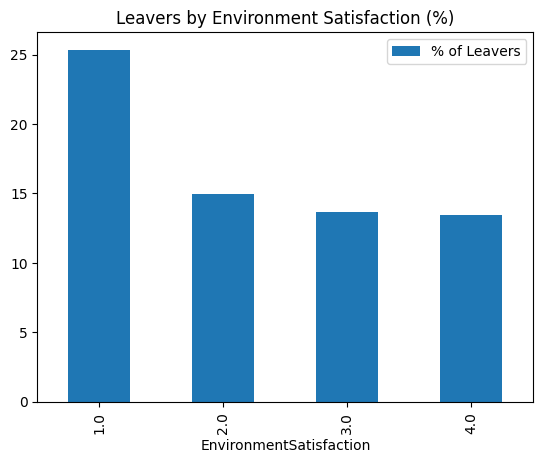

In [69]:
df_EnvironmentSatisfaction = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['EnvironmentSatisfaction'].unique()):
    ratio = df_HR[(df_HR['EnvironmentSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['EnvironmentSatisfaction']==field].shape[0]
    df_EnvironmentSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Env = df_EnvironmentSatisfaction.groupby(by="EnvironmentSatisfaction").sum()
df_Env.plot(kind='bar',title='Leavers by Environment Satisfaction (%)')

> Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. <br> 
Proportion of Leaving Employees decreases as the Job Satisfaction score increases.

In [70]:
# Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
df_HR['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by Job Satisfaction (%)'}, xlabel='JobSatisfaction'>

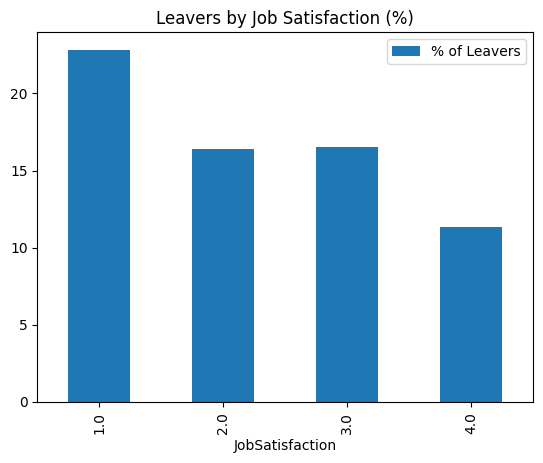

In [71]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['JobSatisfaction'].unique()):
    ratio = df_HR[(df_HR['JobSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()
df_JS.plot(kind='bar',title='Leavers by Job Satisfaction (%)')

> Relationship Satisfaction was captured as: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'.

In [72]:
df_HR['RelationshipSatisfaction'].value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

<Axes: title={'center': 'Leavers by Relationship Satisfaction (%)'}, xlabel='RelationshipSatisfaction'>

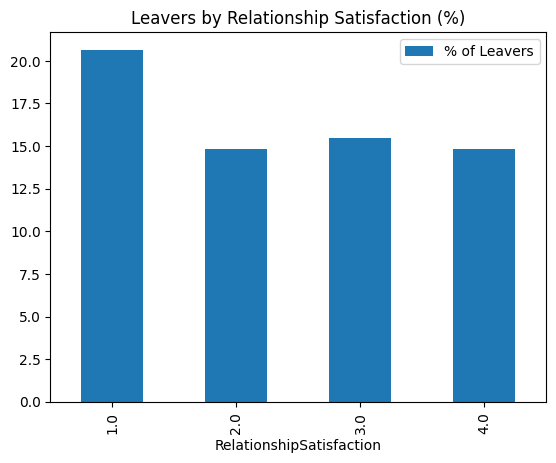

In [73]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['RelationshipSatisfaction'].unique()):
    ratio = df_HR[(df_HR['RelationshipSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()
df_RS.plot(kind='bar',title='Leavers by Relationship Satisfaction (%)')

> Employee Performance Rating was captured as: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

In [74]:
df_HR['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [75]:
print("Normalised percentage of leavers by Stock Option Level: 3: {:.2f}%, 4: {:.2f}%".format(
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['PerformanceRating'] == 3)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['PerformanceRating'] == 4)].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 3: 33.56%, 4: 6.21%


<Axes: title={'center': 'Leavers by Performance Rating (%)'}, xlabel='PerformanceRating'>

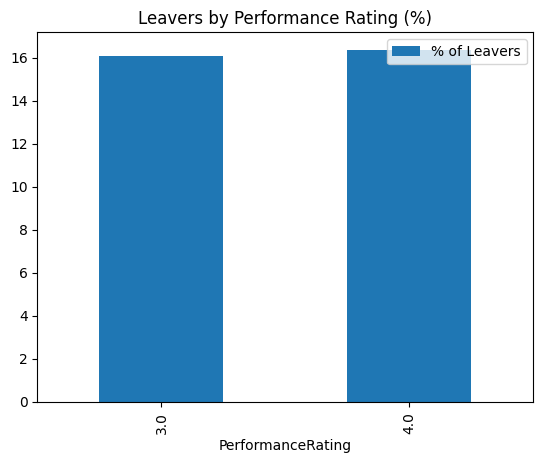

In [76]:
df_PerformanceRating = pd.DataFrame(columns=["PerformanceRating", "% of Leavers"])
i=0
for field in list(df_HR['PerformanceRating'].unique()):
    ratio = df_HR[(df_HR['PerformanceRating']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['PerformanceRating']==field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_PR = df_PerformanceRating.groupby(by="PerformanceRating").sum()
df_PR.plot(kind='bar',title='Leavers by Performance Rating (%)')

### Target Variable: Attrition

> The feature 'Attrition' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'Attrition' by using other related features associated with the employee's personal and professional history. 

In [77]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_HR['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [78]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Attrition'] == 'No'].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Attrition'] == 'Yes'].shape[0] / df_HR.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


> As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

> Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

### EDA Concluding Remarks

Let's summarise the findings from this EDA: <br>

> - The dataset does not feature any missing or erroneous data values, and all features are of the correct data type. <br>
- The strongest positive correlations with the target features are: **Performance Rating**, **Monthly Rate**, **Num Companies Worked**, **Distance From Home**. 
- The strongest negative correlations with the target features are: **Total Working Years**, **Job Level**, **Years In Current Role**, and **Monthly Income**.
- The dataset is **imbalanced** with the majoriy of observations describing Currently Active Employees. <br>
- Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18. <br>

Other observations include: <br>
> - Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts. <br>
- About 10% of leavers left when they reach their 2-year anniversary at the company. <br>
- Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts. <br>
- People who live further away from their work show higher proportion of leavers compared to their counterparts.<br>
- People who travel frequently show higher proportion of leavers compared to their counterparts.<br>
- People who have to work overtime show higher proportion of leavers compared to their counterparts.<br>
- Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.<br>
- Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.<br>

## Pre-processing Pipeline

In this section, we undertake data pre-processing steps to prepare the datasets for Machine Learning algorithm implementation.

### Encoding

> Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. To avoid introducing feature importance for categorical features with large numbers of unique values, we will use both Lable Encoding and One-Hot Encoding as shown below.

In [79]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [80]:
print(df_HR.shape)
df_HR.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [81]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_HR.columns[1:]:
    if df_HR[col].dtype == 'object':
        if len(list(df_HR[col].unique())) <= 2:
            le.fit(df_HR[col])
            df_HR[col] = le.transform(df_HR[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [82]:
# convert rest of categorical variable into dummy
df_HR = pd.get_dummies(df_HR, drop_first=True)

> The resulting dataframe has **49 columns** for 1,470 employees.

In [83]:
print(df_HR.shape)
df_HR.head()

(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,1,2,3,1,61,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,...,False,True,False,False,False,False,False,False,True,False


### Feature Scaling

> Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 5.

In [84]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_HR.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_HR[col] = df_HR[col].astype(float)
    df_HR[[col]] = scaler.fit_transform(df_HR[[col]])
df_HR['Attrition'] = pd.to_numeric(df_HR['Attrition'], downcast='float')
df_HR.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [85]:
print('Size of Full Encoded Dataset: {}'. format(df_HR.shape))

Size of Full Encoded Dataset: (1470, 49)


### Splitting data into training and testing sets

> Prior to implementating or applying any Machine Learning algorithms, we must decouple training and testing datasets from our master dataframe.

In [86]:
# assign the target to a new dataframe and convert it to a numerical feature
#df_target = df_HR[['Attrition']].copy()
target = df_HR['Attrition'].copy()

In [87]:
type(target)

pandas.core.series.Series

In [88]:
# let's remove the target feature and redundant features from the dataset
df_HR.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df_HR.shape))

Size of Full dataset is: (1470, 44)


In [89]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_HR,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 44)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 44)
Number transactions y_test dataset:  (368,)


## Building Machine Learning Models

### Baseline Algorithms

> Let's first use a range of **baseline** algorithms (using out-of-the-box hyper-parameters) before we move on to more sophisticated solutions. The algorithms considered in this section are: **Logistic Regression**, **Random Forest**, **SVM**, **KNN**, **Decision Tree Classifier**, **Gaussian NB**.

In [90]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

> Let's evaluate each model in turn and provide accuracy and standard deviation scores

In [91]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,82.03,8.06,74.49,5.53
2,SVM,78.88,8.21,84.48,4.18
1,Random Forest,78.86,7.01,85.30,3.75
5,Gaussian NB,75.06,5.10,68.14,3.14
3,KNN,66.42,9.90,84.21,4.04
4,Decision Tree Classifier,58.02,6.23,76.22,4.23


> **Classification Accuracy** is the number of correct predictions made as a ratio of all predictions made. <br> 
It is the most common evaluation metric for classification problems. However, it is often **misused** as it is only really suitable when there are an **equal number of observations in each class** and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.

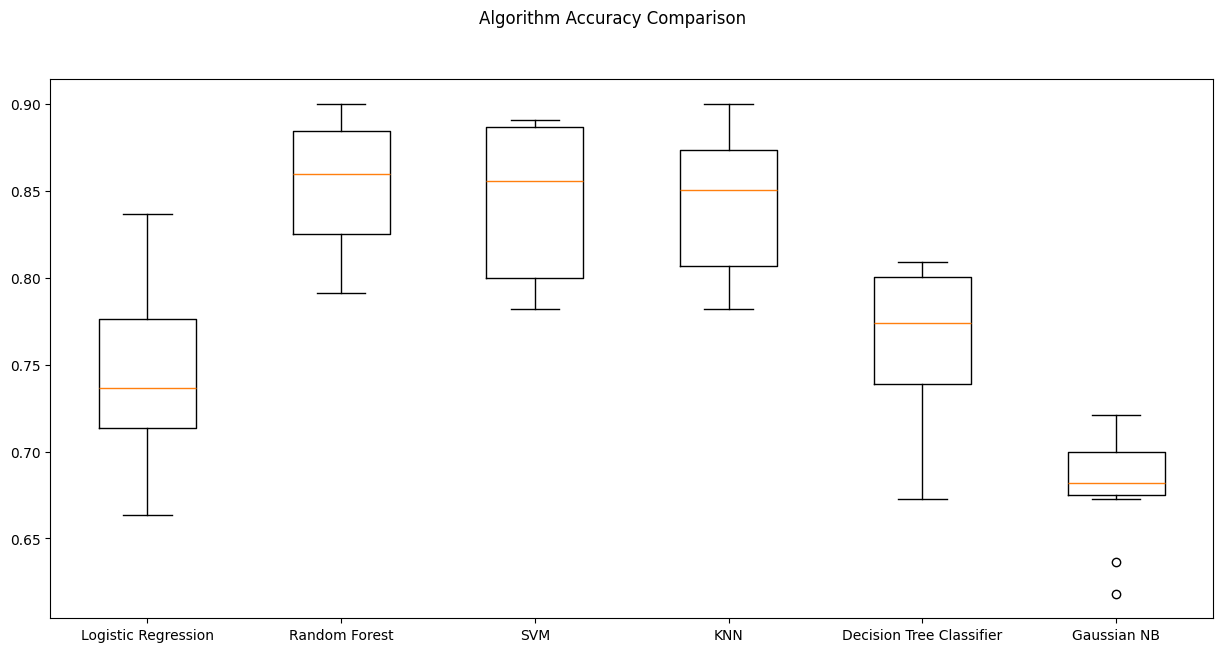

In [92]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

> **Area under ROC Curve** (or AUC for short) is a performance metric for binary classification problems. <br>
The AUC represents a **model’s ability to discriminate between positive and negative classes**. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

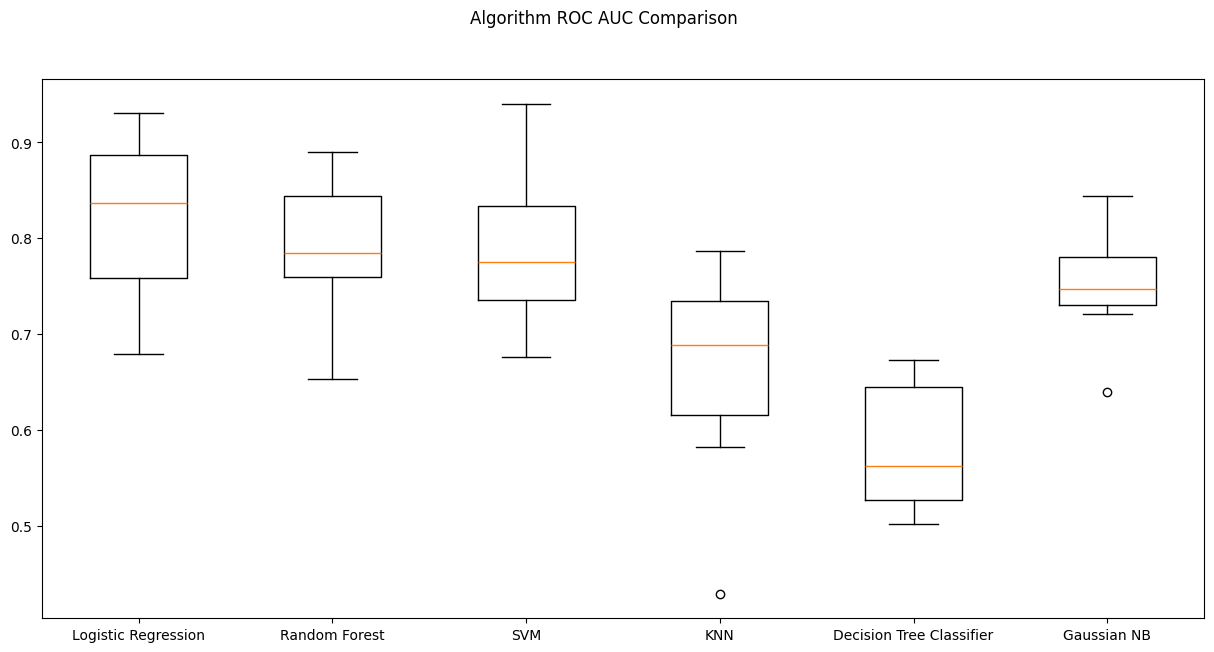

In [93]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

> Based on our ROC AUC comparison analysis, **Logistic Regression** and **Random Forest** show the highest mean AUC scores. We will shortlist these two algorithms for further analysis. See below for more details on these two algos.

**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. Logistic Regression is classification algorithm that is not as sophisticated as the ensemble methods or boosted decision trees method discussed below. Hence, it provides us with a good benchmark. 

![title](https://cdn-images-1.medium.com/max/1600/0*vRhSdZ_k4wrP6Bl8.jpg)

**Random Forest** is a popular and versatile machine learning method that is capable of solving both regression and classification. Random Forest is a brand of Ensemble learning, as it relies on an ensemble of decision trees. It aggregates Classification (or Regression) Trees. A decision tree is composed of a series of decisions that can be used to classify an observation in a dataset.

Random Forest fits a number of decision tree classifiers on various **sub-samples of the dataset** and use **averaging** to improve the predictive accuracy and control over-fitting. Random Forest can handle a large number of features, and is helpful for estimating which of your variables are important in the underlying data being modeled.

### Logistic Regression

> Let's take a closer look at using the Logistic Regression algorithm. I'll be using 10 fold Cross-Validation to train our Logistic Regression Model and estimate its AUC score.

In [94]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.82 (0.08)


#### Fine-tuning

> GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

In [95]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.10099999999999998, class_weight='balanced',
                   random_state=7, solver='liblinear')
best params: {'C': 0.10099999999999998}
best score: 0.8154962538233308


> As shown above, the results from GridSearchCV provided us with fine-tuned hyper-parameter using ROC_AUC as the scoring metric.

#### Evaluation

Text(0.5, 427.9555555555555, 'Predicted label')

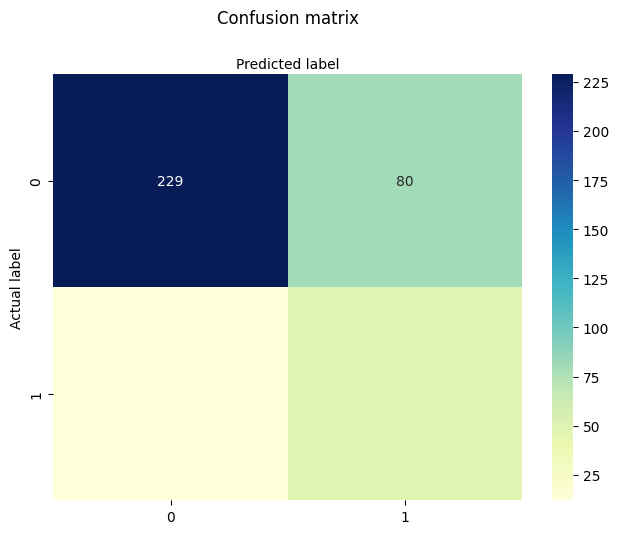

In [96]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [97]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 75.00


> The Confusion matrix is telling us that we have 231+47 correct predictions and 78+12 incorrect predictions. In other words, an accurac of 75.54%.

In [98]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83       309
         1.0       0.37      0.80      0.51        59

    accuracy                           0.75       368
   macro avg       0.66      0.77      0.67       368
weighted avg       0.86      0.75      0.78       368



> Instead of getting binary estimated target features (0 or 1), a probability can be associated with the predicted target. <br> The output provides a first index referring to the probability that the data belong to **class 0** (employee not leaving), and the second refers to the probability that the data belong to **class 1** (employee leaving).

> The resulting AUC score is: 0.857 which is higher than that best score during the optimisation step.

In [99]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.857
